<a href="https://colab.research.google.com/github/AnIsAsPe/Recomendaci-n-de-libros-usando-LDA/blob/main/Recomendaci%C3%B3n_de_libros_usando_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas y funciones

In [21]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning) 

In [22]:
# Procesamiento y Visualizacion de Datos
import pandas as pd
import numpy as np
from collections import Counter # para contar frecuencias
import matplotlib.pyplot as plt 
import seaborn as sns 

# Preprocesar texto
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
from wordcloud import WordCloud

# Modelado de tópicos
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\conte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stopwords_nltk = stopwords.words('spanish')
print(stopwords_nltk, len(stopwords_nltk))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [24]:
stopwords = pd.read_csv('https://gist.githubusercontent.com/cr0wg4n/78554c5d0afa9944d2fa3a4435d83a57/raw/df59fb916108f2a58bf1a3d8c62818b44231586d/spanish-stop-words.txt', header=None)
stopwords_list = stopwords[0].tolist()
print(stopwords_list, len(stopwords_list))

['a', 'actualmente', 'adelante', 'además', 'afirmó', 'agregó', 'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas', 'alguno', 'algunos', 'algún', 'alrededor', 'ambos', 'ampleamos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aquel', 'aquellas', 'aquellos', 'aqui', 'aquí', 'arriba', 'aseguró', 'así', 'atras', 'aunque', 'ayer', 'añadió', 'aún', 'bajo', 'bastante', 'bien', 'buen', 'buena', 'buenas', 'bueno', 'buenos', 'cada', 'casi', 'cerca', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'comentó', 'como', 'con', 'conocer', 'conseguimos', 'conseguir', 'considera', 'consideró', 'consigo', 'consigue', 'consiguen', 'consigues', 'contra', 'cosas', 'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanto', 'cuatro', 'cuenta', 'cómo', 'da', 'dado', 'dan', 'dar', 'de', 'debe', 'deben', 'debido', 'decir', 'dejó', 'del', 'demás', 'dentro', 'desde', 'después', 'dice', 'dicen', 'dicho', 'dieron', 'diferente', 'diferentes', 'dijeron', 'dijo', 'dio', 'donde', 'dos', 'durante', 'e', '

<h2>  Funciones

In [25]:
def nube_palabras(sec_textos):
    # Crear la cadena con la que haremos la nube de palabras
    text= " ".join(review for review in sec_textos)
    
    # Crear la nube de palabras
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          background_color="white", 
                          normalize_plurals=False, 
                          collocations=False).generate(text)
    

    # Desplegar la imagen generada
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [26]:
def preprocesar(texto):
  #convierte a minúsculas
  texto = (texto).lower()

  #elimina stopwords
  stop = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*') #stopwords.words('spanish')
  texto = stop.sub('', texto) 

  #Quitar puntuación y números
  texto = re.sub('[^ña-záéíóúü]+', ' ', texto)

  #lematizar y quedarnos con palabras que tengan más de tres caracteres
  # st = PorterStemmer()
  lemma = WordNetLemmatizer()
  texto = texto.split()
  texto = ' '.join([lemma.lemmatize(i) for i in texto if len(i)>2])
  
  return(texto)

# Lectura y exploración de datos

In [27]:
import glob

speech_list = glob.glob('C:\\Users\\conte\\OneDrive\\Escritorio\\Discursos\\AF\\*.txt')

df_af = pd.DataFrame(columns=['speech','date','speech_length'], index=[i for i in range(len(speech_list))])

for key, speech in enumerate(speech_list):
    with open(speech, 'r', encoding='utf-8') as file:
        df_af['speech'][key] = file.read()
    df_af['date'][key] = speech[51:53] + '/' + speech[54:56] + '/' + speech[57:61]
    df_af['speech'][key] = df_af['speech'][key].replace('(APLAUSOS)','')
    df_af['speech'][key] = df_af['speech'][key].replace('(APLAUSO)','')
    df_af['speech'][key] = df_af['speech'][key].replace('PRESIDENTE FERNANDEZ.-','')
    df_af['speech'][key] = df_af['speech'][key].replace('FERNANDEZ.-','')
    df_af['speech'][key] = df_af['speech'][key].replace('PRESIDENTE.-','')
    df_af['speech'][key] = df_af['speech'][key].replace('PERIODISTA.-','')
    df_af['speech_length'][key] = len(df_af['speech'][key].split())

In [28]:
# Dtypes assignment
df_af['speech'] = df_af['speech'].astype(str)
df_af['date'] = df_af['date'].astype('M')
df_af['speech_length'] = df_af['speech_length'].astype(int)

#Sorting by date
df_af = df_af.sort_values('date')

df_af

,speech,date,speech_length
424,Señora Vicepresidente; Diputadas; Diputados; S...,2019-12-10,7411
429,"Buenas noches, Argentina. Qué linda es esta no...",2019-12-11,1174
440,"Bueno, buenos días, buenas tardes, buen mediod...",2019-12-18,2223
442,"Parece que hay otro protocolo, pero voy a romp...",2019-12-20,1696
454,Muchas gracias a todos y a todas. Voy a empeza...,2019-12-30,1233
...,...,...,...
314,Muy bien. Buenas tardes. Muchas gracias a todo...,2022-09-07,2248
315,Buen día a todos y todas las chicas y chicos d...,2022-09-07,911
327,Buenas tardes a todos y todas; hemos venido h...,2022-09-14,2087
329,Buen día a todos y a todas. Gracias querido de...,2022-09-15,2476


In [29]:
speechs = ' '.join(df_af['speech'][i]for i in range(len(df_af)))

print(f'Total words in speech: {len(speechs.split())}')
words_speechs = Counter(speechs.split())
words_speechs.most_common(10)

Total words in speech: 758972


[('que', 43039),
 ('de', 34938),
 ('la', 25764),
 ('y', 23226),
 ('a', 19796),
 ('en', 17946),
 ('el', 17210),
 ('los', 11443),
 ('es', 9771),
 ('un', 9346)]

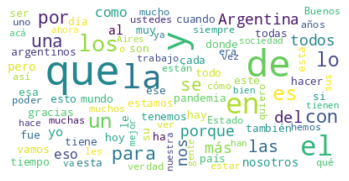

In [30]:
nube_palabras(df_af['speech'])

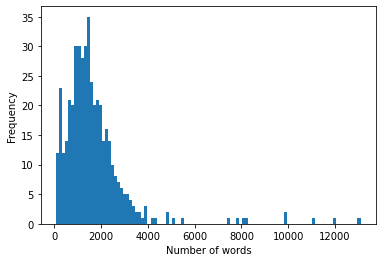

In [31]:
df_af['speech_length'].plot.hist(bins=100)
plt.xlabel('Number of words')
plt.show()

In [32]:
df_af['speech_length'].describe()

count      455.00000
mean      1668.07033
std       1472.47176
min         73.00000
25%        892.50000
50%       1406.00000
75%       2029.50000
max      13100.00000
Name: speech_length, dtype: float64

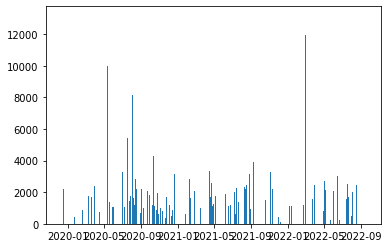

In [33]:
plt.bar(df_af['date'], df_af['speech_length'])
plt.show()

# Obtener los tópicos principales

## Vectorización de textos

In [34]:
df_af['summary'] = df_af['speech'].apply(preprocesar)

df_af['summary_length'] = df_af['summary'].str.split().str.len()

df_af.head()

,speech,date,speech_length,summary,summary_length
424,Señora Vicepresidente; Diputadas; Diputados; S...,2019-12-10,7411,señora vicepresidente diputadas diputados sena...,3135
429,"Buenas noches, Argentina. Qué linda es esta no...",2019-12-11,1174,noches argentina linda noche ustedes cuánto qu...,373
440,"Bueno, buenos días, buenas tardes, buen mediod...",2019-12-18,2223,días tardes mediodía gracias invitación oportu...,756
442,"Parece que hay otro protocolo, pero voy a romp...",2019-12-20,1696,protocolo romperlo diputados dejaron dormir no...,541
454,Muchas gracias a todos y a todas. Voy a empeza...,2019-12-30,1233,gracias empezar pedirle disculpas tardé argent...,456


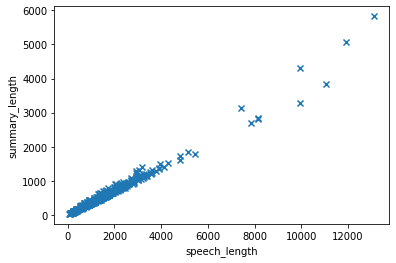

In [35]:
plt.scatter(df_af['speech_length'], df_af['summary_length'], marker='x')
plt.xlabel('speech_length')
plt.ylabel('summary_length')
plt.show()

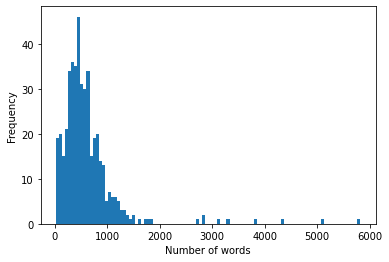

In [36]:
df_af['summary_length'].plot.hist(bins=100)
plt.xlabel('Number of words')
plt.show()

In [37]:
df_af['summary_length'].describe()

count     455.000000
mean      603.760440
std       569.090349
min        24.000000
25%       321.500000
50%       489.000000
75%       728.000000
max      5824.000000
Name: summary_length, dtype: float64

In [38]:
summaries = ' '.join(df_af['summary'][i]for i in range(len(df_af)))

print(f'Total words in speech: {len(summaries.split())}')
words_summaries = Counter(summaries.split())
words_summaries.most_common(10)

Total words in speech: 274711


[('argentina', 4792),
 ('gracias', 1981),
 ('país', 1707),
 ('argentinos', 1505),
 ('mundo', 1460),
 ('día', 1457),
 ('pandemia', 1441),
 ('años', 1303),
 ('ustedes', 1006),
 ('quiero', 954)]

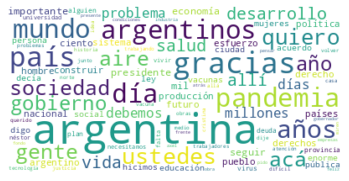

In [39]:
nube_palabras(df_af['summary'])

In [78]:
vectorizer = CountVectorizer(min_df = 10, max_df = 0.15, ngram_range=(1,3))
BOW = vectorizer.fit_transform(df_af['summary'])
BOW.shape

(455, 4059)

In [79]:
vocabulario = vectorizer.get_feature_names_out()
len(vocabulario)

4059

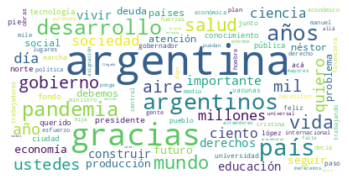

In [80]:
nube_palabras(vocabulario)

## Entrenamiento del modelo

El número óptimo de topicos depende de las caracteristicas del texto a analizar (el largo de los textos, la cantidad de distintas ideas)

No obstante existen algunas metricas que ayudan a determinar k.

In [81]:
k = 5

In [82]:
lda_model = LatentDirichletAllocation(n_components=k, learning_method='online', max_iter=1000, random_state=42) 

In [83]:
%%time
lda_model.fit(BOW) # entrena el modelo y obtienela matriz documento-topico

CPU times: total: 1min 1s
Wall time: 2min 31s


LatentDirichletAllocation(learning_method='online', max_iter=1000,
                          n_components=5, random_state=42)

### Distribución de temas en cada noticia  ($\theta$)

In [84]:
doc_top = pd.DataFrame(lda_model.transform(BOW))
print(doc_top.shape)
doc_top.head()

(455, 5)


,0,1,2,3,4
0,0.911262,0.000145,0.000143,0.088306,0.000144
1,0.001256,0.661567,0.001230,0.334698,0.001250
2,0.259961,0.737993,0.000682,0.000684,0.000680
3,0.035742,0.716803,0.059981,0.186425,0.001049
4,0.001245,0.001253,0.001247,0.995011,0.001245


In [85]:
doc_top.sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
450    1.0
451    1.0
452    1.0
453    1.0
454    1.0
Length: 455, dtype: float64

In [86]:
df_lda = pd.merge(df_af, doc_top, left_index=True, right_index=True)
df_lda.head()

,speech,date,speech_length,summary,summary_length,0,1,2,3,4
424,Señora Vicepresidente; Diputadas; Diputados; S...,2019-12-10,7411,señora vicepresidente diputadas diputados sena...,3135,0.011593,0.987017,0.000465,0.000465,0.000460
429,"Buenas noches, Argentina. Qué linda es esta no...",2019-12-11,1174,noches argentina linda noche ustedes cuánto qu...,373,0.000512,0.686064,0.000507,0.312411,0.000506
440,"Bueno, buenos días, buenas tardes, buen mediod...",2019-12-18,2223,días tardes mediodía gracias invitación oportu...,756,0.000545,0.997817,0.000547,0.000549,0.000542
442,"Parece que hay otro protocolo, pero voy a romp...",2019-12-20,1696,protocolo romperlo diputados dejaron dormir no...,541,0.552430,0.435831,0.003900,0.003926,0.003913
454,Muchas gracias a todos y a todas. Voy a empeza...,2019-12-30,1233,gracias empezar pedirle disculpas tardé argent...,456,0.097680,0.709424,0.000877,0.000875,0.191143


### Distribución de palabras en cada tema ($\mu$)

In [87]:
μs = pd.DataFrame(lda_model.exp_dirichlet_component_,
                         columns=vocabulario)
print(μs.shape)
μs

(5, 4059)


,abajo,abandonado,abiertas,abierto,abiertos,abogado,abogados,abordar,abrazamos,abrazar,...,área metropolitana aire,áreas,época,ética,éticamente,ético,éxito,íbamos,órbita,únicos
0,5.191839e-05,5.614212e-05,2.366634e-05,5.678147e-04,2.908667e-07,5.994139e-05,2.489633e-07,5.710639e-04,2.366368e-07,3.184893e-07,...,2.499320e-07,5.182994e-04,3.101962e-04,5.112564e-04,4.194595e-05,9.654177e-05,3.642913e-04,1.000310e-04,2.350575e-04,3.020094e-07
1,3.424704e-04,4.059159e-04,1.227406e-04,8.831583e-05,9.189320e-08,4.068465e-04,9.096774e-08,9.404164e-08,1.852114e-04,6.649454e-05,...,8.750771e-08,8.904444e-08,2.353634e-04,8.100889e-04,1.763361e-04,9.579887e-04,4.555981e-05,9.426103e-04,1.765853e-04,5.017258e-05
2,4.743238e-04,1.233766e-04,7.055073e-05,1.608598e-04,3.812677e-04,2.143314e-04,8.503046e-05,2.371544e-04,2.690048e-07,4.108379e-04,...,3.622696e-03,3.657856e-05,5.060894e-05,2.697421e-07,2.975977e-07,1.466581e-04,6.242713e-04,5.030954e-04,2.539571e-07,1.589757e-04
3,3.332649e-04,3.385991e-07,1.044465e-04,3.194211e-07,1.453400e-04,1.211740e-03,1.453202e-03,3.351793e-07,2.743930e-04,3.810335e-04,...,3.063999e-07,3.115270e-07,7.622980e-04,8.531300e-04,5.675718e-07,3.346731e-07,2.275952e-04,3.063549e-04,3.064854e-07,4.191536e-04
4,8.464329e-07,4.799168e-07,5.395215e-07,1.891231e-04,1.265195e-04,4.919008e-07,4.855808e-07,6.315685e-04,5.105743e-07,5.027076e-07,...,4.782427e-07,4.844088e-07,4.793072e-07,5.606248e-07,4.039972e-04,6.513597e-07,5.830273e-07,5.058166e-07,5.146398e-07,6.455522e-07



Palabras más frecuentes del topico 0
['recuperación', 'marco', 'programa', 'mercosur', 'medidas', 'diálogo', 'malvinas', 'soberanía', 'integral', 'naciones']


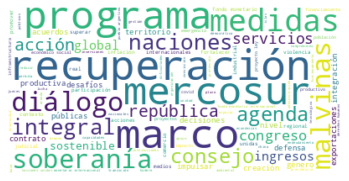


Palabras más frecuentes del topico 1
['gas', 'viviendas', 'san martín', 'obra pública', 'universidades', 'rioja', 'jorge', 'daniel', 'inflación', 'ypf']


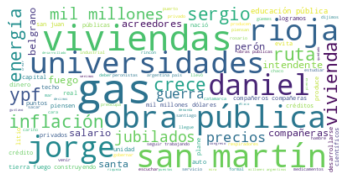


Palabras más frecuentes del topico 2
['contagios', 'cuarentena', 'camas', 'contagio', 'medidas', 'enfermedad', 'provincia aire', 'dosis', 'área', 'metropolitana']


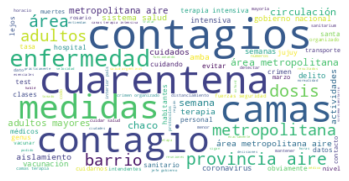


Palabras más frecuentes del topico 3
['perón', 'jóvenes', 'cultura', 'género', 'independencia', 'lucha', 'memoria', 'armada', 'arte', 'dictadura']


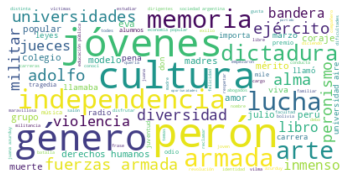


Palabras más frecuentes del topico 4
['capitalismo', 'continente', 'méxico', 'financiera', 'energía', 'gas', 'guerra', 'ambiente', 'climático', 'brasil']


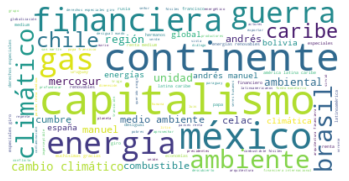

In [88]:
for top in range(k):
  print(f'\nPalabras más frecuentes del topico {top}')
  words = list(μs.T[top].sort_values(ascending=False).head(10).index)
  freq = μs.T[top].sort_values(ascending=False).head(100)
  print(words)
  wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          background_color="white", 
                          normalize_plurals=False, 
                          collocations=False).generate_from_frequencies(freq)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()
                          
                      

### Visualización del modelo

In [89]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_model, BOW, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.063403 -0.014598       1        1  44.345744
2     -0.031537 -0.194971       2        1  17.496572
0      0.090414 -0.018948       3        1  17.302777
3     -0.188775  0.129643       4        1  13.110983
4      0.193300  0.098873       5        1   7.743924, topic_info=                    Term        Freq       Total Category  logprob  loglift
1750                 gas  302.000000  302.000000  Default  30.0000  30.0000
808            contagios  182.000000  182.000000  Default  29.0000  29.0000
513          capitalismo  130.000000  130.000000  Default  28.0000  28.0000
938           cuarentena  149.000000  149.000000  Default  27.0000  27.0000
483                camas  153.000000  153.000000  Default  26.0000  26.0000
...                  ...         ...         ...      ...      ...      ...
2369              medium   30.294029   53.408598   Topic5  -5.7736   1.9912
1502              españa   32.014821   69.190747   Topic5  -5.7183   1.7876
1776              global   34.854374  115.859671   Topic5  -5.6334   1.3571
444              bolivia   31.811406   74.043904   Topic5  -5.7247   1.7134
2491  muchísimas gracias   30.335186   77.332985   Topic5  -5.7722   1.6224

[354 rows x 6 columns], token_table=      Topic      Freq                     Term
term                                          
6         2  0.072887                 abogados
6         4  0.874642                 abogados
28        1  0.115036                   acción
28        2  0.156868                   acción
28        3  0.627471                   acción
...     ...       ...                      ...
4041      1  0.992912                      ypf
4047      2  0.915399                     área
4047      3  0.078463                     área
4048      2  0.996052       área metropolitana
4049      2  0.986662  área metropolitana aire

[692 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4, 5])

### Guardamos modelo

In [90]:
# import pickle
# path = 'C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\Clusterizacion\\Notebooks'
# tuple_models = (lda_model, BOW, vectorizer)
# pickle.dump(tuple_models, open (path + "tuple_model_books_k10.pkl", 'wb'))

In [91]:
# import pickle
# path = 'C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\Clusterizacion\\Notebooks'
# lda_model, BOW, vectorizer = pickle.load(open(path + "tuple_model_books_k10.pkl", 'rb'))


## Sistema de recomendación usando similitud coseno

In [92]:

# def similitud_coseno(a_vector, b_vector):
#     '''Calcula la similitud coseno entre los vectores a y b'''

#     numerador = np.dot(a_vector, b_vector)
    
#     a_norm = np.sqrt(np.sum(a_vector**2))  
#     b_norm = np.sqrt(np.sum(b_vector**2))
    
#     denominador = a_norm * b_norm
    
#     similitud_coseno = numerador / denominador 
    
#     return similitud_coseno

In [93]:
# def documentos_similares(titulo):
#   inx = df[df['Title']==titulo].index[0]
#   q_k = doc_top.loc[inx].values
#   n = doc_top.shape[0]
#   similaridad = {}
#   relevantes={}
  
#   # Calcular similitud coseno
#   for doc_inx in range(n):
#       if doc_inx == inx:
#           continue
#       similaridad[doc_inx] = similitud_coseno(q_k, doc_top.loc[doc_inx].values)

#   rank = {k:v for k,v in sorted(similaridad.items(), key=lambda x: x[1], 
#                                 reverse=True)}
#   top10 = pd.DataFrame.from_dict(rank, orient = 'index', columns=['sim_cos']).head()
#   recomendaciones = pd.merge(df.iloc[:,0:3], top10, how='right',  right_index=True, left_index=True)        
#   recomendaciones.index = np.arange(1, 6)
#   return recomendaciones

  